In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical



In [14]:
# corpus = ["I enjoy learning NLP and machine learning",
#           "CBOW is an interesting model for word embeddings",
#           "Understanding word context is important for NLP"]

# Step 1: Read the corpus from a .txt file
with open("./CBOW.txt", "r") as file:
    text = file.read()

# Step 2: Preprocess the text
sentences = text.split('.')  # Split by periods to get individual sentences
sentences = [s.lower().strip() for s in sentences if s.strip()]  # Lowercase and strip whitespaces

In [15]:
# Convert the text to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
print("After converting our words in the corpus into a vector of integers:")
print(sequences)

After converting our words in the corpus into a vector of integers:
[[1, 38, 2, 8, 9, 39, 40, 41, 2, 42, 13, 1, 43, 23], [3, 44, 11, 24, 45, 46, 47, 1, 14, 25, 48, 10, 26, 2, 27, 12, 11, 24, 15, 16, 1, 14, 13, 49, 50, 17, 4, 5, 6], [1, 15, 16, 7, 4, 5, 6, 9, 51, 10, 18, 19, 52, 20, 28, 7, 3, 6, 1, 15, 16, 9, 29, 20], [30, 53, 31, 3, 32, 54, 55, 17, 4, 5], [56, 8, 33, 1, 57, 29, 19, 20, 2, 58, 59, 60, 61, 62, 8, 63, 2, 1, 6, 64, 1, 26, 2, 27, 21, 9, 11, 34, 35, 2, 8, 7, 3], [33, 65, 28, 66, 22, 67, 31, 68, 22, 69, 70, 32, 71, 4, 5, 6, 72, 73, 74, 75, 10, 76, 77, 78, 79, 30, 80, 81, 82, 10, 18, 11, 34, 35, 2, 8], [1, 83, 36, 21, 1, 36, 2, 84, 85, 86, 25, 87, 88, 89, 21, 9, 90, 10, 18, 13, 37, 12, 37], [19, 7, 4, 5, 6, 91, 17, 7, 3], [92, 93, 7, 94, 4, 5, 12, 3, 23, 22, 95, 96, 12, 14, 97, 98, 99, 100, 101, 102]]


Now, we will build the CBOW model having window size = 2.



In [16]:
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 3

# Generate context-target pairs
contexts = []
targets = []
for seq in sequences:
    for i in range(window_size, len(seq) - window_size):
        context = seq[i - window_size:i] + seq[i + 1:i + window_size + 1]
        target = seq[i]
        contexts.append(context)
        targets.append(target)

X = np.array(contexts)
y = to_categorical(targets, vocab_size)

In [17]:
X

array([[  1,  38,   2,   9,  39,  40],
       [ 38,   2,   8,  39,  40,  41],
       [  2,   8,   9,  40,  41,   2],
       [  8,   9,  39,  41,   2,  42],
       [  9,  39,  40,   2,  42,  13],
       [ 39,  40,  41,  42,  13,   1],
       [ 40,  41,   2,  13,   1,  43],
       [ 41,   2,  42,   1,  43,  23],
       [  3,  44,  11,  45,  46,  47],
       [ 44,  11,  24,  46,  47,   1],
       [ 11,  24,  45,  47,   1,  14],
       [ 24,  45,  46,   1,  14,  25],
       [ 45,  46,  47,  14,  25,  48],
       [ 46,  47,   1,  25,  48,  10],
       [ 47,   1,  14,  48,  10,  26],
       [  1,  14,  25,  10,  26,   2],
       [ 14,  25,  48,  26,   2,  27],
       [ 25,  48,  10,   2,  27,  12],
       [ 48,  10,  26,  27,  12,  11],
       [ 10,  26,   2,  12,  11,  24],
       [ 26,   2,  27,  11,  24,  15],
       [  2,  27,  12,  24,  15,  16],
       [ 27,  12,  11,  15,  16,   1],
       [ 12,  11,  24,  16,   1,  14],
       [ 11,  24,  15,   1,  14,  13],
       [ 24,  15,  16,  1

#### Define CBOW model

In [18]:
# Step 4: Define the CBOW model
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_size,
              input_length=2 * window_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(units=vocab_size, activation='softmax')
])

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [20]:
# Initialize weights by making a prediction
model.predict(X[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


array([[0.0097356 , 0.00966709, 0.00966491, 0.00962634, 0.00976347,
        0.00971424, 0.00977078, 0.0097224 , 0.00971762, 0.00974376,
        0.00981382, 0.00969252, 0.00964575, 0.00971304, 0.0096911 ,
        0.00975271, 0.0096715 , 0.00981061, 0.00964034, 0.00969552,
        0.0097194 , 0.00973323, 0.00971594, 0.00965927, 0.00963864,
        0.00977497, 0.00965554, 0.00968159, 0.00977593, 0.0097761 ,
        0.0097189 , 0.00965727, 0.00971049, 0.00978097, 0.0096184 ,
        0.00971439, 0.00966914, 0.00974628, 0.00972923, 0.00966034,
        0.00980394, 0.00969601, 0.00963385, 0.0097424 , 0.00978739,
        0.00977817, 0.00967292, 0.00968917, 0.00974079, 0.00970529,
        0.0097142 , 0.00976373, 0.00976485, 0.00960689, 0.0097467 ,
        0.00963565, 0.00978422, 0.00976061, 0.0097327 , 0.00969566,
        0.00963699, 0.00963716, 0.00970028, 0.00972242, 0.00971403,
        0.00972448, 0.00962573, 0.00974087, 0.00973121, 0.00976239,
        0.00974489, 0.00974395, 0.00969148, 0.00

In [21]:
# Train the model
model.fit(X, y, epochs=100, verbose=0)

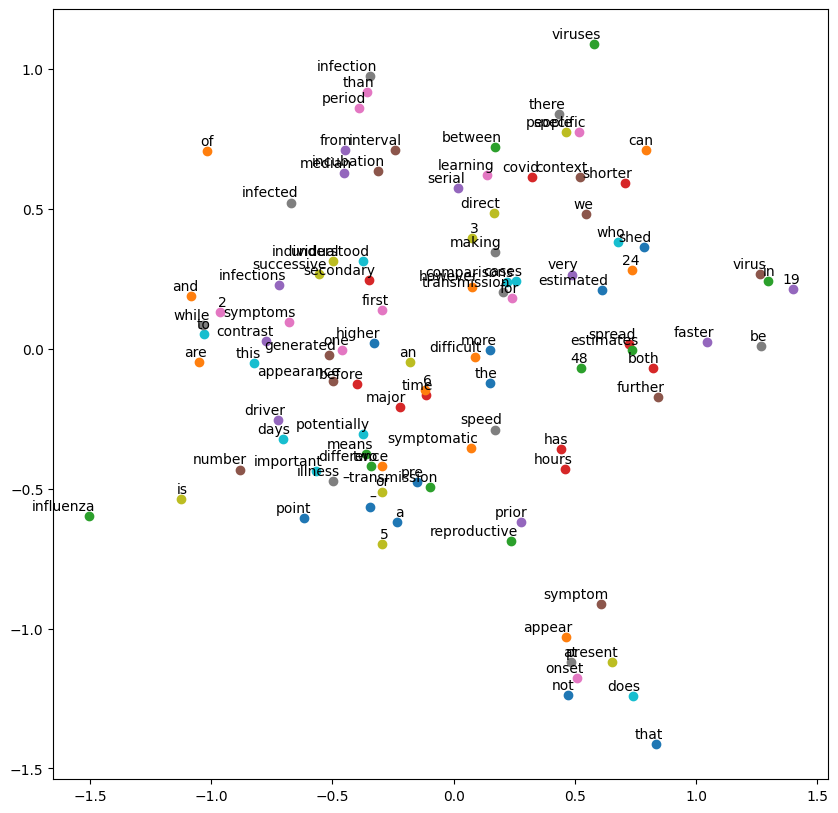

In [23]:
# Get the embeddings
embeddings = model.get_weights()[0]

# Step 5: Perform PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Step 6: Visualize the embeddings
plt.figure(figsize=(10, 10))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()


In [ ]:
'''
Here's a line-by-line breakdown of your code, the significance of each part, and possible viva questions with answers for each step:

---

### Line-by-Line Code Explanation:

#### 1. **Importing Libraries**:
```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical
```
- **Explanation**: These are the necessary imports for the task.
  - `tensorflow`: Deep learning framework used to build the model.
  - `Sequential`: Keras model class used for building a sequential neural network.
  - `Dense`, `Embedding`, `Lambda`: Layers used in the model. `Dense` is a fully connected layer,
  `Embedding` is used for embedding words, and `Lambda` is for custom operations like averaging.
  - `Tokenizer`: Keras utility for converting text into sequences of integers.
  - `numpy`: Numerical operations library, useful for working with arrays.
  - `matplotlib.pyplot`: Used for visualization of embeddings.
  - `PCA`: Principal Component Analysis, used for dimensionality reduction of the embeddings.
  - `to_categorical`: Converts integer labels to one-hot encoded vectors.

**Viva Questions**:
1. **What is the role of the `Embedding` layer in this code?**
   - The `Embedding` layer is used to convert words into dense vectors of fixed size, 
   representing each word as a dense vector in a continuous vector space.

2. **Why are `PCA` and `matplotlib` used together?**
   - `PCA` is used to reduce the dimensionality of the word embeddings, 
   and `matplotlib` visualizes them in 2D space for better understanding and analysis.

---

#### 2. **Reading the Corpus from File**:
```python
with open("./CBOW.txt", "r") as file:
    text = file.read()
```
- **Explanation**: This reads the entire text corpus from a file named `CBOW.txt` into the variable `text`.

**Viva Question**:
1. **What does the `open()` function do here?**
   - `open()` opens the file in read mode (`"r"`), and the contents of the file are read using the `read()` method.

---

#### 3. **Preprocessing the Text**:
```python
sentences = text.split('.')  # Split by periods to get individual sentences
sentences = [s.lower().strip() for s in sentences if s.strip()]  # Lowercase and strip whitespace
```
- **Explanation**: 
  - `text.split('.')`: Splits the text into individual sentences using a period as a delimiter.
  - The second line removes extra spaces, lowercases the text, and filters out empty sentences (e.g., empty after splitting).

**Viva Questions**:
1. **Why do we convert the text to lowercase?**
   - Converting to lowercase ensures that words like "Hello" and "hello" are treated the same, avoiding differentiation due to case sensitivity.

2. **What is the significance of the `strip()` method here?**
   - `strip()` removes any leading or trailing whitespace, cleaning up the sentences.

---

#### 4. **Tokenizing the Sentences**:
```python
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
print("After converting our words in the corpus into a vector of integers:")
print(sequences)
```
- **Explanation**:
  - `Tokenizer()`: Initializes the tokenizer object that will convert words to integers.
  - `fit_on_texts(sentences)`: This method learns the vocabulary from the provided sentences.
  - `texts_to_sequences(sentences)`: Converts the sentences into sequences of integers, 
  where each word is replaced by its corresponding integer from the tokenizer's vocabulary.

**Viva Questions**:
1. **What is the role of the `Tokenizer` class?**
   - `Tokenizer` converts text into integer sequences, where each word is represented by a unique integer based on its frequency in the text.

2. **What does `texts_to_sequences` do?**
   - It converts each sentence into a sequence of integers, where each integer corresponds to a word in the sentence.

---

#### 5. **Generating Context-Target Pairs**:
```python
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 3
contexts = []
targets = []
for seq in sequences:
    for i in range(window_size, len(seq) - window_size):
        context = seq[i - window_size:i] + seq[i + 1:i + window_size + 1]
        target = seq[i]
        contexts.append(context)
        targets.append(target)

X = np.array(contexts)
y = to_categorical(targets, vocab_size)

X
```
- **Explanation**:
  - `vocab_size`: The number of unique words in the vocabulary (plus one for padding).
  - `embedding_size`: The size of the word embeddings.
  - `window_size`: The size of the context window, i.e., the number of words on either side of the target word.
  - The loop iterates through each sentence, generating context-target pairs for training:
    - `context`: A list of words surrounding the target word (within the window).
    - `target`: The target word itself (the central word in the context window).
  - `X` is the array of context words, and `y` is the one-hot encoded target words.

**Viva Questions**:
1. **What is the significance of `window_size` in generating context-target pairs?**
   - The `window_size` defines the number of surrounding words (context) 
   used to predict the target word. Larger windows provide broader context, while smaller windows are more localized.

2. **Why use `to_categorical` for `y`?**
   - `to_categorical` converts the target integer labels into one-hot encoded vectors, making it suitable for classification tasks.

---

#### 6. **Defining the CBOW Model**:
```python
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_size,
              input_length=2 * window_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(units=vocab_size, activation='softmax')
])
```
- **Explanation**:
  - `Embedding`: Converts the input context words into dense vector representations (embeddings).
  - `Lambda(lambda x: tf.reduce_mean(x, axis=1))`: A custom operation that averages the embeddings of all 
  context words to form a single context vector.
  - `Dense`: A fully connected layer that outputs a probability distribution over the vocabulary for the target word, using the 
  `softmax` activation function.

**Viva Questions**:
1. **Why use the `Embedding` layer here?**
   - It converts words into dense vectors of fixed size, which capture semantic information about the words.

2. **What does the `Lambda` layer do?**
   - It averages the embeddings of the context words to create a single context vector that is used to predict the target word.

3. **What is the role of the `softmax` activation in the `Dense` layer?**
   - The `softmax` activation function transforms the output of the layer into a probability distribution over the vocabulary, where the target word is most likely.

---

#### 7. **Compiling the Model**:
```python
model.compile(optimizer='adam', loss='categorical_crossentropy')
```
- **Explanation**:
  - `optimizer='adam'`: Adam optimizer is used because it adapts the learning rate for better convergence.
  - `loss='categorical_crossentropy'`: Since this is a multi-class classification problem (predicting one word from many possible words), categorical cross-entropy is used as the loss function.

**Viva Questions**:
1. **Why use `categorical_crossentropy` as the loss function?**
   - `categorical_crossentropy` is used because the problem is a classification task where the model predicts one word from a set of possible words (vocabulary).

---

#### 8. **Training the Model**:
```python
model.fit(X, y, epochs=100, verbose=0)
```
- **Explanation**: 
  - This trains the CBOW model for 100 epochs using the data (`X`, `y`). `verbose=0` suppresses the output during training.
# verbose=0: No output during training
model.fit(X, y, epochs=10, verbose=0)

# verbose=1: Display a progress bar and summary of metrics for each epoch
model.fit(X, y, epochs=10, verbose=1)

# verbose=2: Display one line per epoch without a progress bar
model.fit(X, y, epochs=10, verbose=2)
---

#### 9. **Getting the Word Embeddings**:
```python
embeddings = model.get_weights()[0]
```
- **Explanation**: This retrieves the learned word embeddings from the first layer of the model.

**Viva Question**:
1. **Why are embeddings retrieved using `model.get_weights()[0]`?**
   - The first layer of the model (the embedding layer) holds the learned word embeddings, which are retrieved to visualize or analyze.

---

#### 10. **Dimensionality Reduction Using PCA**:
```python
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
```
- **Explanation**:
  - `PCA(n_components=2)`: Initializes PCA to reduce the embeddings to 2 dimensions for visualization.
  - `fit_transform(embeddings)`: Applies PCA to the embeddings and reduces their dimensionality.

---

#### 11. **Visualizing the Embeddings**:
```python
plt.figure(figsize=(10, 10))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced

_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()
```
- **Explanation**:
  - This part plots the reduced embeddings in a 2D space using `matplotlib` and annotates each point with the corresponding word.

**Viva Question**:
1. **What does PCA do in this case?**
   - PCA reduces the high-dimensional word embeddings (which may have hundreds of dimensions) to 2D, making it easier to visualize.

---

Here are the answers to the potential viva questions based on the provided code:

### 1. **What is CBOW (Continuous Bag of Words)?**
   **Answer**: 
   CBOW (Continuous Bag of Words) is a neural network architecture used in natural language processing (NLP) for learning word embeddings.
   In CBOW, the goal is to predict a target word based on the surrounding context words.
   The context words are given as input, and the network tries to predict the target word. 
   The term "Bag of Words" means that the model considers the context words without regard to their order in the sentence 
   (i.e., only the words present in the context window matter, not their positions).

### 2. **Why is tokenization important in NLP?**
   **Answer**: 
   Tokenization is the process of splitting a sequence of text into individual units, 
   such as words or phrases. It is crucial in NLP because it converts raw text into a structured format that
   machine learning models can understand. Tokenization helps in transforming text into sequences of tokens
   (words or subwords), which are then mapped to integers or word embeddings for further processing, such as training a language model.

### 3. **What is the role of the Embedding layer in this code?**
   **Answer**: 
   The `Embedding` layer in this code is responsible for converting words (represented as integers) into dense vectors (word embeddings).
   Each word in the vocabulary is mapped to a vector in a continuous vector space.
   These word embeddings are learned during training and capture semantic relationships between words. The `Embedding`
   layer helps the model learn representations of words that encode their meanings,
   enabling the model to perform well on tasks like word prediction (in CBOW).

### 4. **Why do we use Lambda for averaging the context words?**
   **Answer**: 
   The `Lambda` layer is used to apply a custom operation—in this case, averaging the embeddings of the context words. 
   In CBOW, the model uses the surrounding words (context words) to predict the target word. 
   The `Lambda` layer computes the mean of the word embeddings across the context words 
   (i.e., it reduces the embeddings' dimensions from the size of the context window to a single vector). 
   This averaged vector is then used to predict the target word, helping the model learn to generalize from the context.

### 5. **What is the purpose of dimensionality reduction in this code?**
   **Answer**: 
   The purpose of dimensionality reduction using PCA (Principal Component Analysis) is to reduce the high-dimensional
   word embeddings (which are typically hundreds of dimensions) to a 2D space for visualization.
   Reducing the embeddings to two dimensions allows for easier visualization of the word vectors and their relationships.
   Words that are semantically similar tend to cluster together in the 2D plot, making it easier to analyze the quality of the learned embeddings.

### 6. **Why is the softmax function used in the output layer?**
   **Answer**: 
   The `softmax` function is used in the output layer to convert the raw output scores into a probability distribution. In CBOW, the task is a classification problem where the model needs to predict the most probable target word from the entire vocabulary given the context. `Softmax` ensures that the output values sum up to 1, representing the probabilities of each word being the target word. The word with the highest probability is chosen as the model's prediction.

### 7. **What does the to_categorical function do?**
   **Answer**: 
   The `to_categorical` function converts integer labels into one-hot encoded vectors. In the context of this code, each target word (integer) is converted into a vector where the index corresponding to the target word is set to 1, and all other positions are set to 0. This is necessary for classification tasks, where each word in the vocabulary is treated as a separate class. One-hot encoding allows the model to predict a probability distribution over the vocabulary.

### 8. **Explain the PCA process and its significance.**
   **Answer**: 
   PCA (Principal Component Analysis) is a statistical technique used for dimensionality reduction.
   In this code, PCA is used to reduce the high-dimensional word embeddings (which typically have 100+ dimensions) to 2 dimensions for visualization. 
   The process involves projecting the original data onto a new set of axes (principal components) 
   that maximize the variance in the data. The first two principal components represent the most significant directions
   of variation in the data. By reducing the dimensionality to 2, PCA allows us to plot the word embeddings in a 2D space, 
   making it easier to visualize relationships between words. Words with similar meanings are likely to cluster together 
   in the reduced space, providing insights into the quality of the learned embeddings.

---

These answers provide detailed explanations of each concept in the context of your code, which should be helpful for your viva preparation.